# Computing Square Adapted Wasserstein Distance 2 with Fitted Value Iteration

This notebook demonstrates how to compute the squared adapted Wasserstein distance using Fitted Value Iteration (FVI). The method leverages conditional density estimation, as described in the paper:

**"Learning conditional distributions on continuous spaces"**  
Cyril Bénézet, Ziteng Cheng, and Sebastian Jaimungal (2024).  
[arXiv:2406.09375](https://arxiv.org/abs/2406.09375)

We utilize a neural network-based approach to estimate conditional densities and train a deep Q-network (DQN) to approximate the adapted optimal transport distance. The codebase integrates various modules for sampling paths, building adapted trees, and solving the transport problem efficiently.

In this notebook, we will:
1. Generate sample paths from Brownian motion.
2. Estimate conditional densities.
3. Train the FVI algorithm to approximate the adapted Wasserstein distance.
4. Compute and compare the real adapted Wasserstein distance as a benchmarking value.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import matplotlib.pyplot as plt
import sys
import os

# Define paths to relevant modules
measure_sampling_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Measure_sampling')
CD_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Conditional_density')
FVI_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI')
Benchmark_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Benchmark_value_Gausian')

# Add paths to sys.path
for path in [measure_sampling_path, CD_path, FVI_path, Benchmark_path]:
    if path not in sys.path:
        sys.path.append(path)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Import necessary modules
from Gen_Path_and_AdaptedTrees import generate_brownian_motion
from CD_knn_NerualNet import train_conditional_density
from IPython.display import display, clear_output
from FVI import train_dqn_instance, train_dqn_instance_nonparam
from Comp_AWD2_Gaussian import build_mean_and_cov, adapted_wasserstein_squared

In [2]:
# Generate Brownian motion paths
n_data = 2000
time_steps = 5  # For example, t=0, t=1, t=2, t=3

scale_x = 1
scale_y = 0.5
x_init = 1
y_init = 2

In [3]:
# Define parameters
a, b = x_init, y_init
var_a, var_b = scale_x**2, scale_y**2
t = time_steps-1

# Build mean and covariance matrices for both processes
a_vec, A_mat = build_mean_and_cov(t, mean_val=a, var_factor=var_a)
b_vec, B_mat = build_mean_and_cov(t, mean_val=b, var_factor=var_b)

# Compute adapted Wasserstein squared distance
distance_squared = adapted_wasserstein_squared(a_vec, A_mat, b_vec, B_mat)
distance = np.sqrt(distance_squared)

print(f"Adapted Wasserstein Squared Distance: {distance_squared:.4f}")
print(f"Adapted Wasserstein Distance: {distance:.4f}")

Adapted Wasserstein Squared Distance: 6.5000
Adapted Wasserstein Distance: 2.5495


-----------------------------------------------
Run: 0.0000


/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/utils.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_batch = torch.stack([torch.tensor(t, dtype=torch.float32) for t in batch.time])


Time step 4 Loss: 0.0002649614025176561
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.08 seconds.
Number of NaN losses encountered: 0


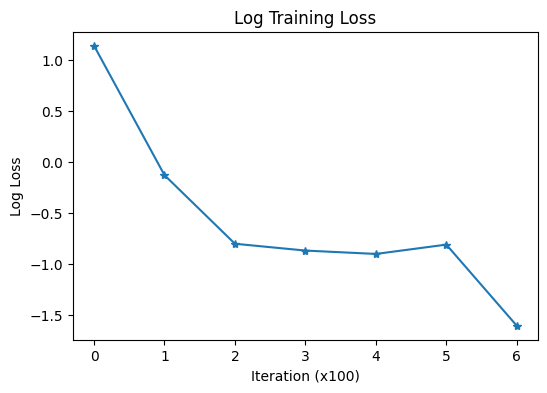

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.63 seconds.
Number of NaN losses encountered: 0


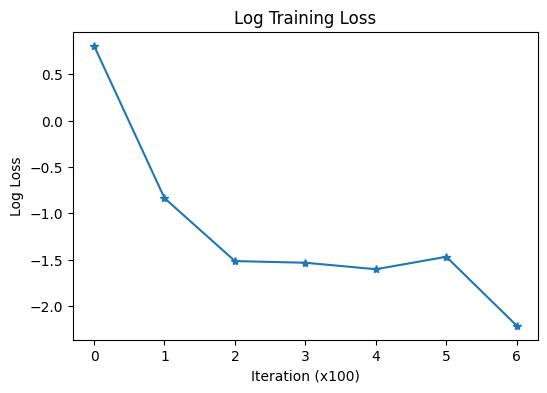

/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/FVI.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_x = torch.tensor(x_est, dtype=torch.float32).reshape(-1, 1)
/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/FVI/FVI.py:127: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_y = torch.tensor(y_est, dtype=torch.float32).reshape(-1, 1)


Time step 3 Loss: 3.8770636510849
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.64 seconds.
Number of NaN losses encountered: 0


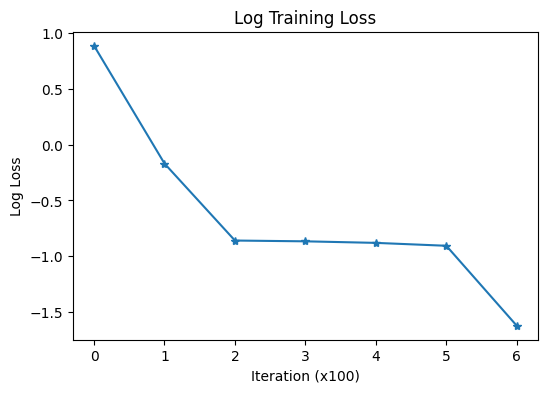

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.74 seconds.
Number of NaN losses encountered: 0


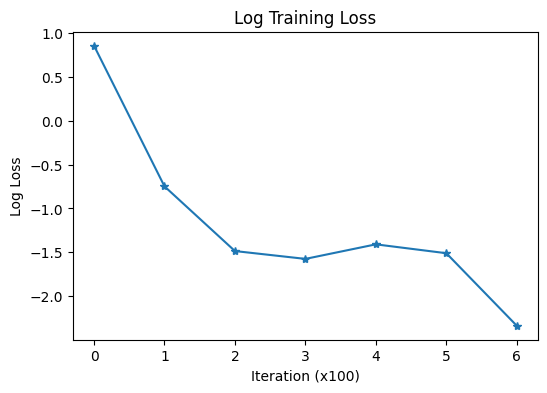

Time step 2 Loss: 1.6654108917713166
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.62 seconds.
Number of NaN losses encountered: 0


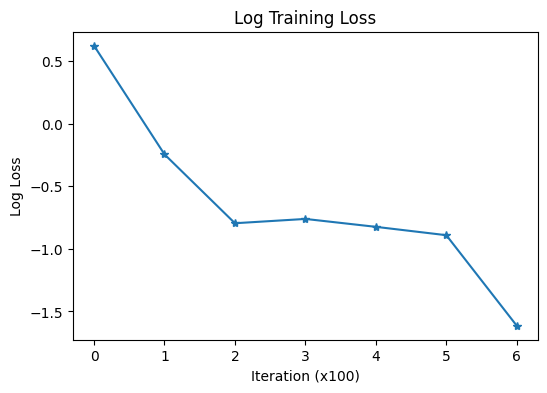

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.69 seconds.
Number of NaN losses encountered: 0


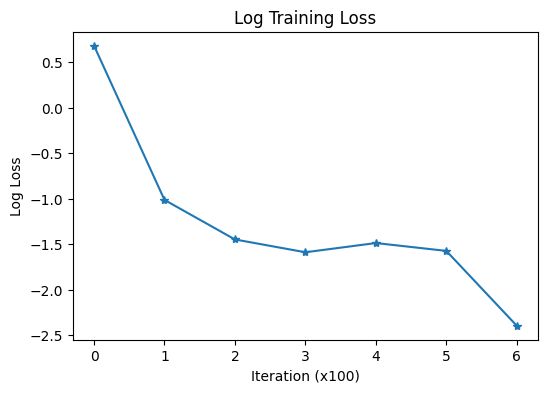

Time step 1 Loss: 0.5363254150748253
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.00 seconds.
Number of NaN losses encountered: 0


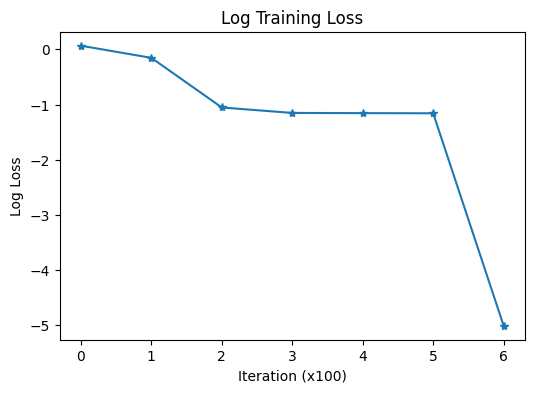

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.07 seconds.
Number of NaN losses encountered: 0


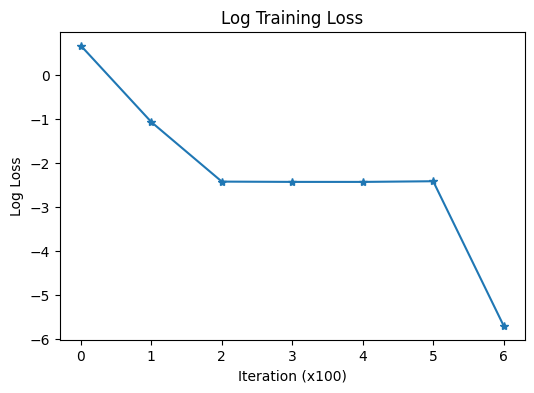

Time step 0 Loss: 0.17593132696842076
Final value at time 0: 10.054443359375
-----------------------------------------------
Run: 1.0000
Time step 4 Loss: 0.005506902301713126
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.64 seconds.
Number of NaN losses encountered: 0


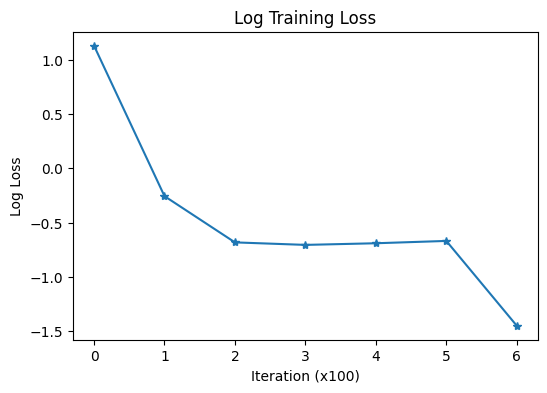

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.67 seconds.
Number of NaN losses encountered: 0


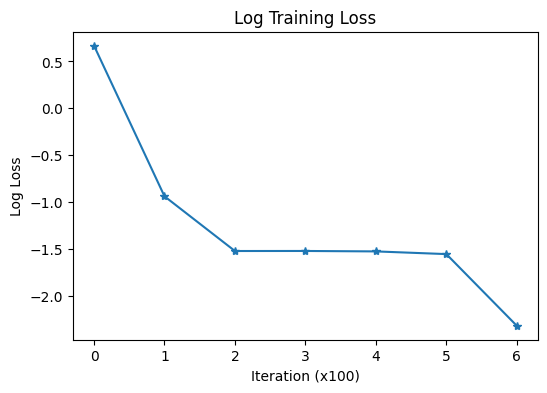

Time step 3 Loss: 3.507760691642761
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.71 seconds.
Number of NaN losses encountered: 0


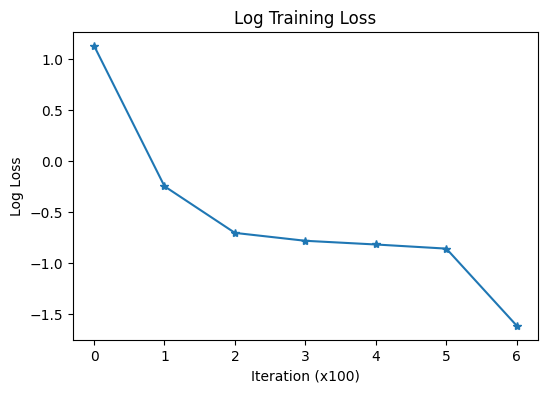

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.67 seconds.
Number of NaN losses encountered: 0


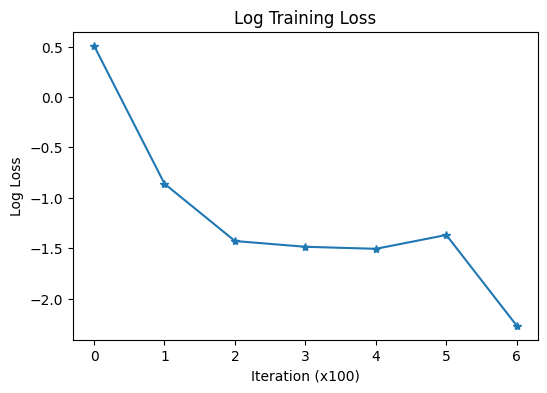

Time step 2 Loss: 1.563097552061081
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.85 seconds.
Number of NaN losses encountered: 0


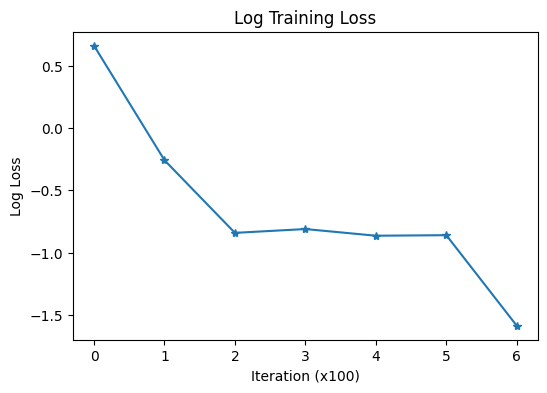

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.41 seconds.
Number of NaN losses encountered: 0


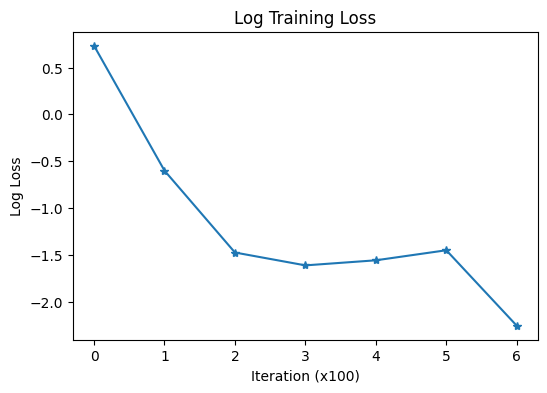

Time step 1 Loss: 0.6665973970293999
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 5.84 seconds.
Number of NaN losses encountered: 0


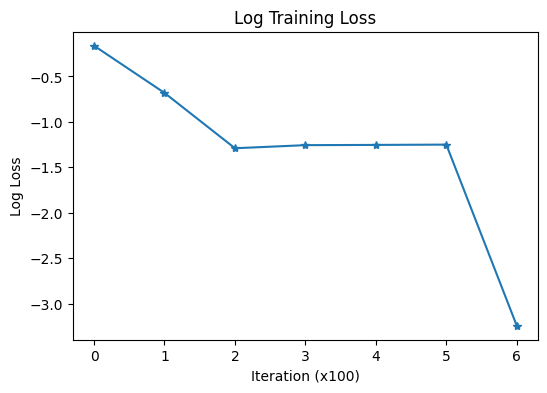

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 5.67 seconds.
Number of NaN losses encountered: 0


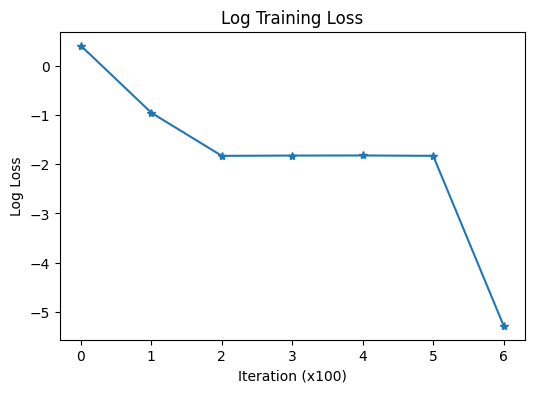

Time step 0 Loss: 0.3077180629766372
Final value at time 0: 5.5504865646362305
-----------------------------------------------
Run: 2.0000
Time step 4 Loss: 0.030047947735001797
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.01 seconds.
Number of NaN losses encountered: 0


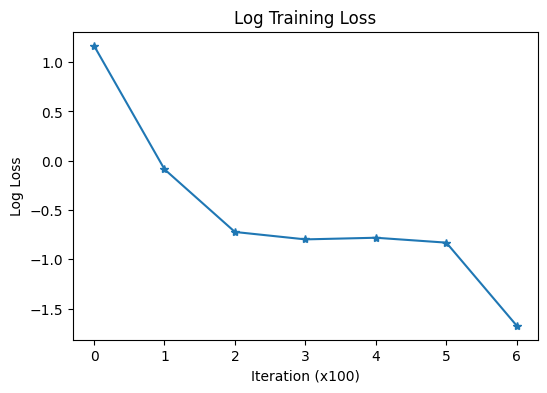

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.02 seconds.
Number of NaN losses encountered: 0


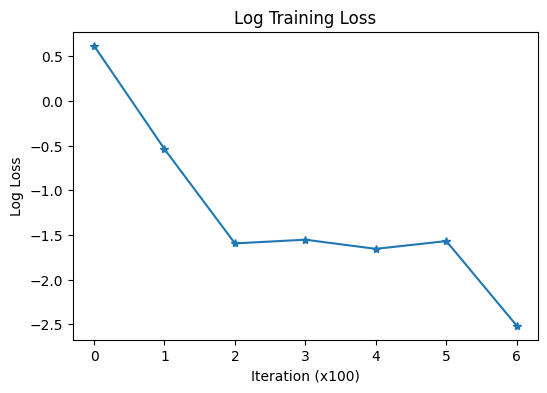

Time step 3 Loss: 3.7526513671875
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.30 seconds.
Number of NaN losses encountered: 0


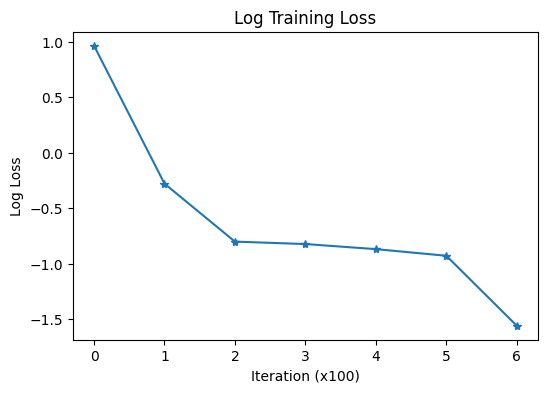

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.41 seconds.
Number of NaN losses encountered: 0


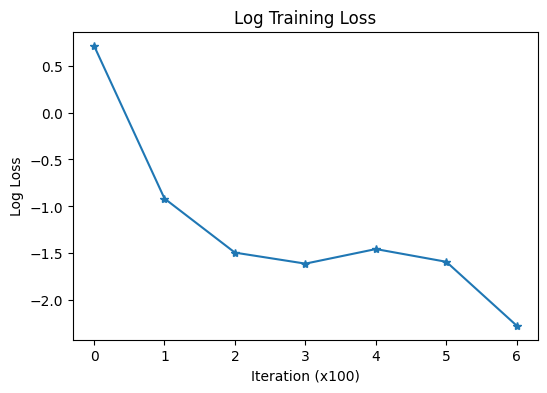

Time step 2 Loss: 2.3096363043785093
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.57 seconds.
Number of NaN losses encountered: 0


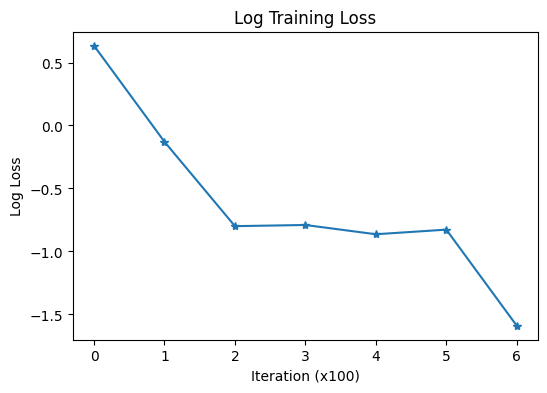

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.59 seconds.
Number of NaN losses encountered: 0


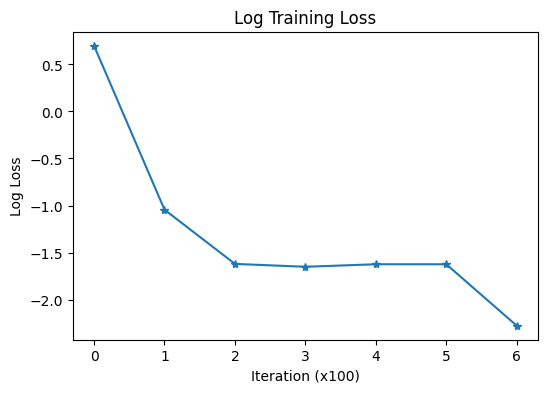

Time step 1 Loss: 0.9119842034578324
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 5.82 seconds.
Number of NaN losses encountered: 0


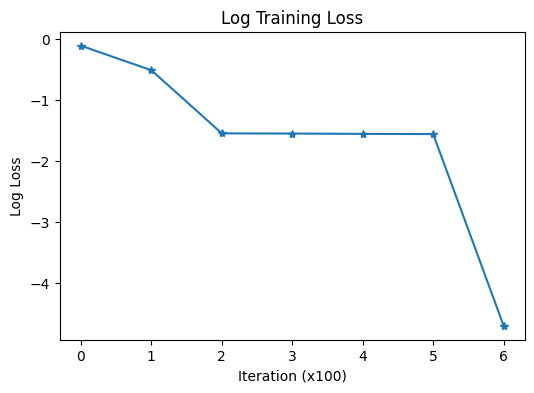

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 5.85 seconds.
Number of NaN losses encountered: 0


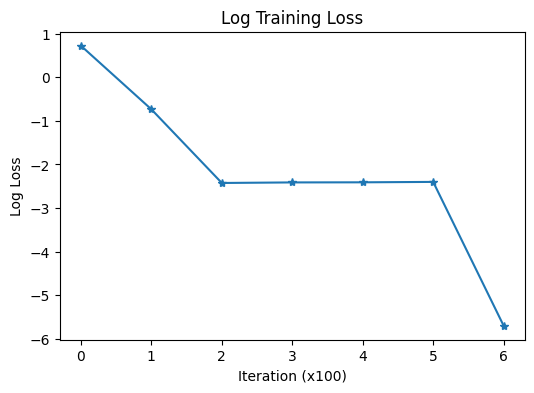

Time step 0 Loss: 0.00018803845515321882
Final value at time 0: 9.591200828552246
-----------------------------------------------
Run: 3.0000
Time step 4 Loss: 0.00013391973194529783
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.64 seconds.
Number of NaN losses encountered: 0


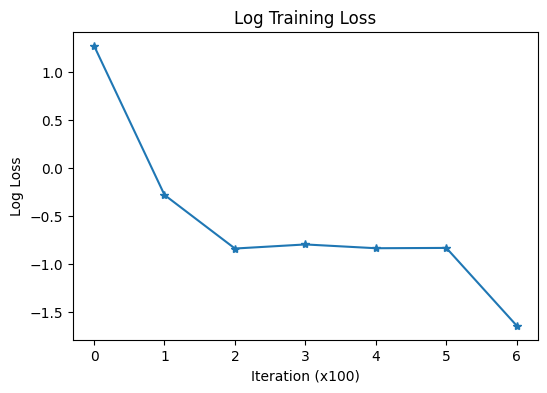

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.59 seconds.
Number of NaN losses encountered: 0


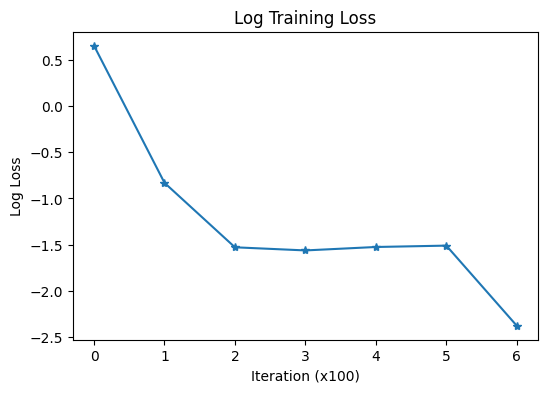

Time step 3 Loss: 3.9540207958221436
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.66 seconds.
Number of NaN losses encountered: 0


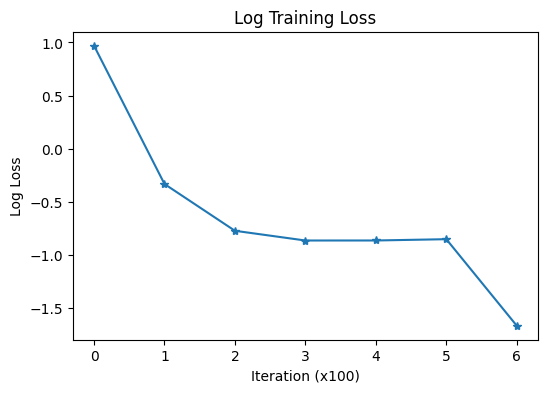

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.57 seconds.
Number of NaN losses encountered: 0


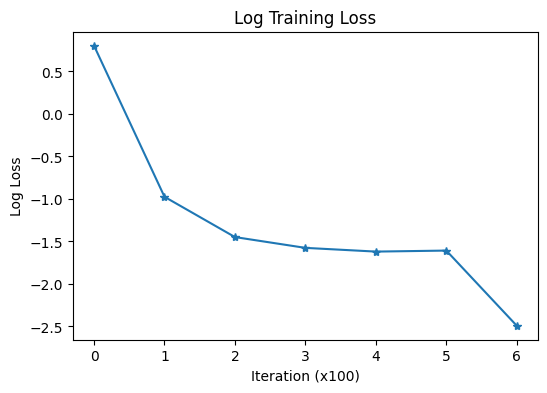

Time step 2 Loss: 2.5402290654182433
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.70 seconds.
Number of NaN losses encountered: 0


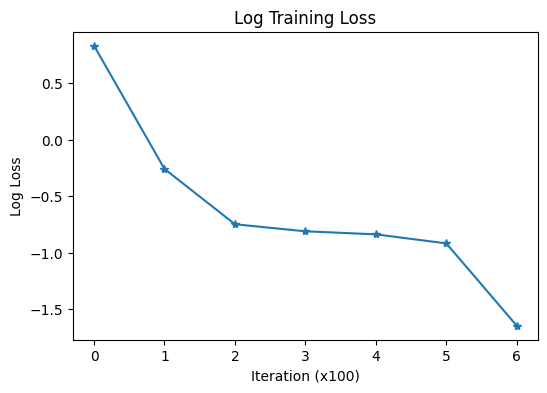

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.22 seconds.
Number of NaN losses encountered: 0


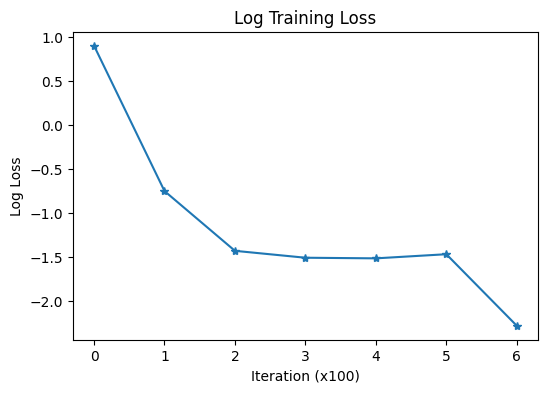

Time step 1 Loss: 1.685308837890625
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.52 seconds.
Number of NaN losses encountered: 0


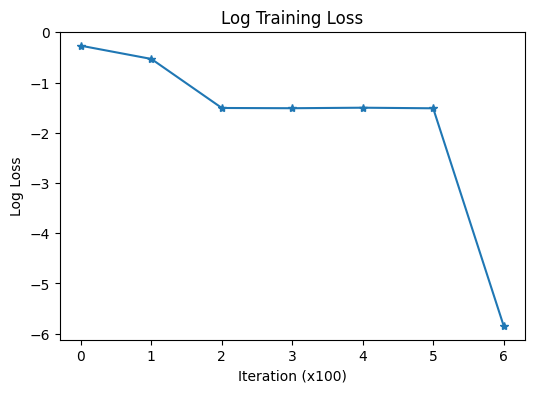

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.55 seconds.
Number of NaN losses encountered: 0


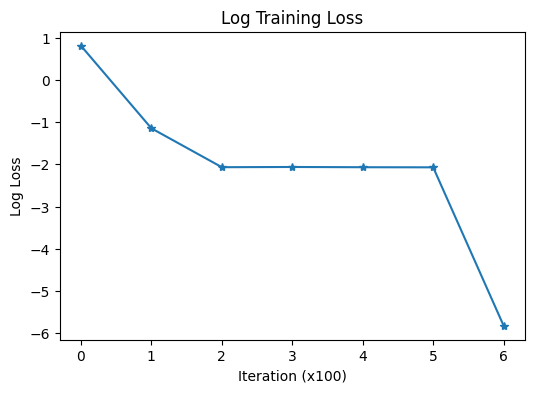

Time step 0 Loss: 0.09127092389450808
Final value at time 0: 7.755729675292969
-----------------------------------------------
Run: 4.0000
Time step 4 Loss: 0.054388041184283795
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.60 seconds.
Number of NaN losses encountered: 0


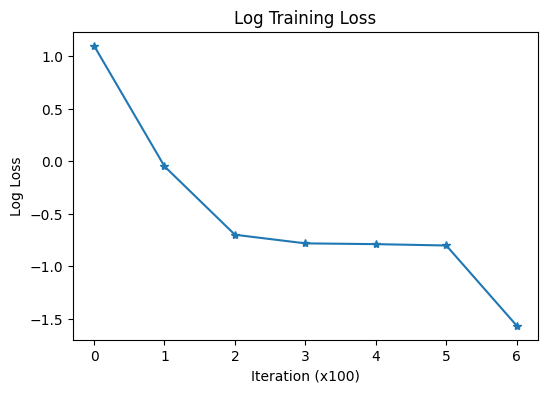

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.64 seconds.
Number of NaN losses encountered: 0


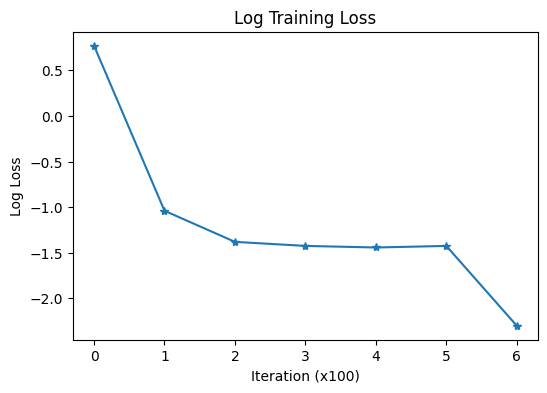

Time step 3 Loss: 4.369672026634216
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.89 seconds.
Number of NaN losses encountered: 0


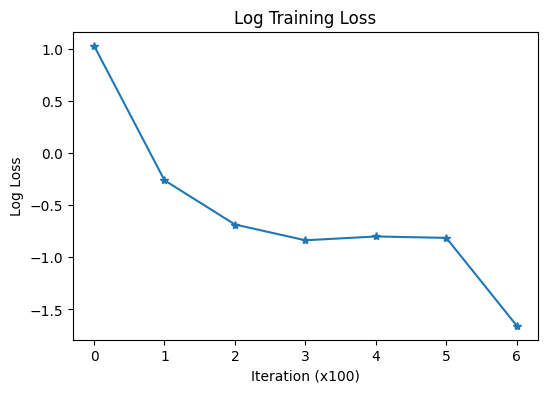

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.81 seconds.
Number of NaN losses encountered: 0


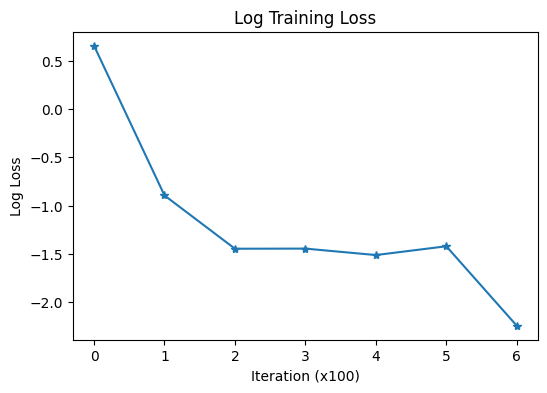

Time step 2 Loss: 2.1624951195716857
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.82 seconds.
Number of NaN losses encountered: 0


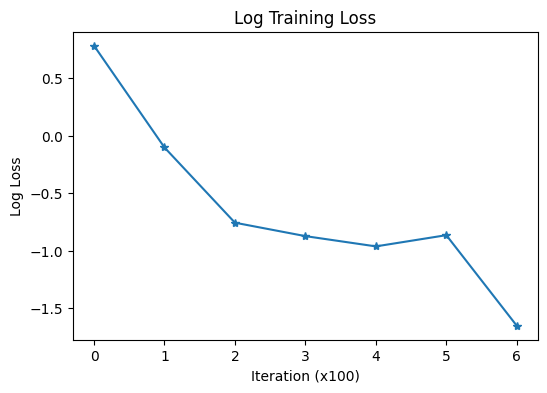

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.79 seconds.
Number of NaN losses encountered: 0


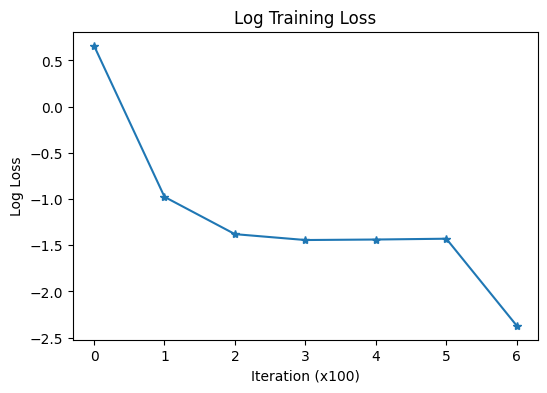

Time step 1 Loss: 0.4573943854868412
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.25 seconds.
Number of NaN losses encountered: 0


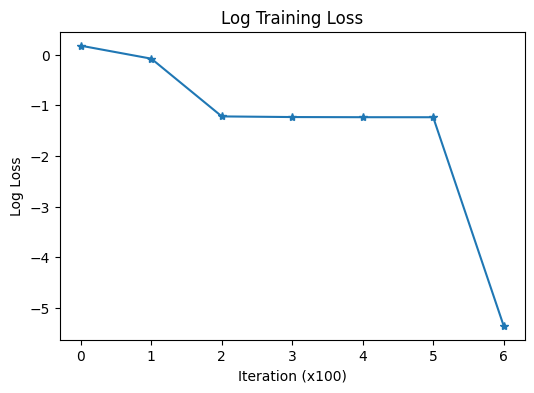

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.83 seconds.
Number of NaN losses encountered: 0


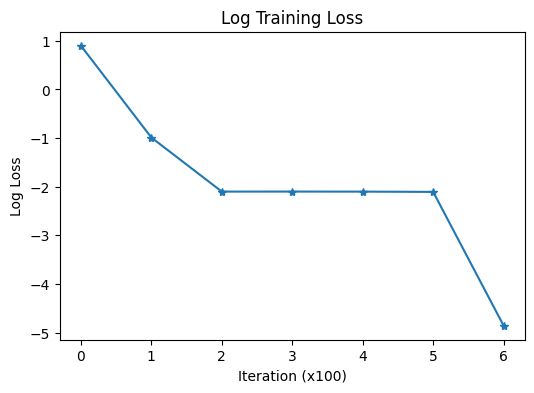

Time step 0 Loss: 0.25871114301742637
Final value at time 0: 8.52438735961914
-----------------------------------------------
Run: 5.0000
Time step 4 Loss: 0.0005063522425734846
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.75 seconds.
Number of NaN losses encountered: 0


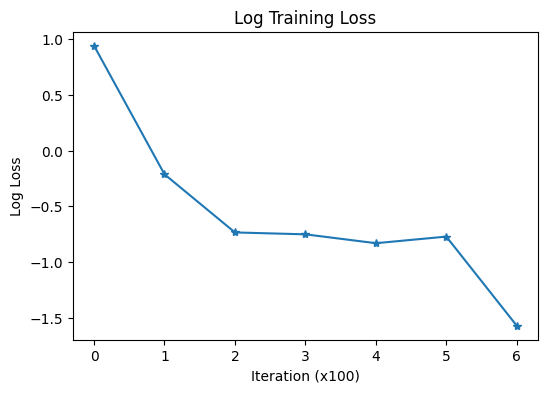

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.34 seconds.
Number of NaN losses encountered: 0


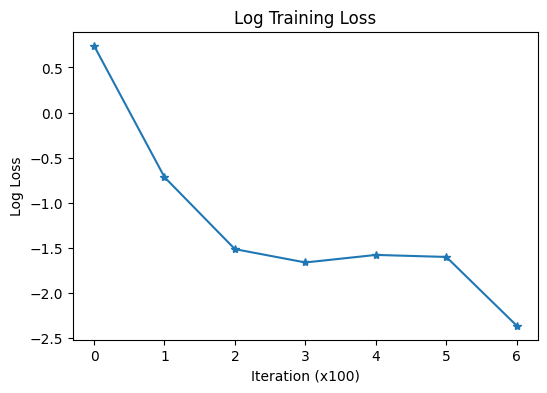

Time step 3 Loss: 3.6290896558761596
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.91 seconds.
Number of NaN losses encountered: 0


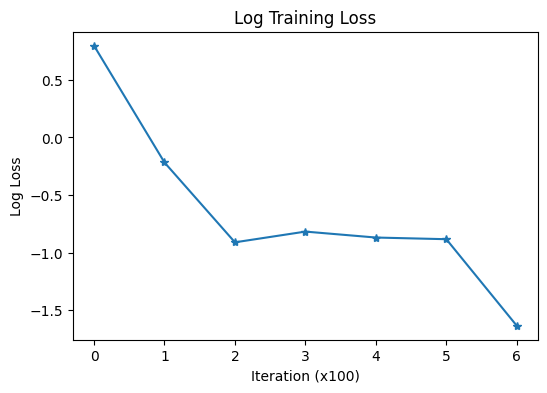

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.28 seconds.
Number of NaN losses encountered: 0


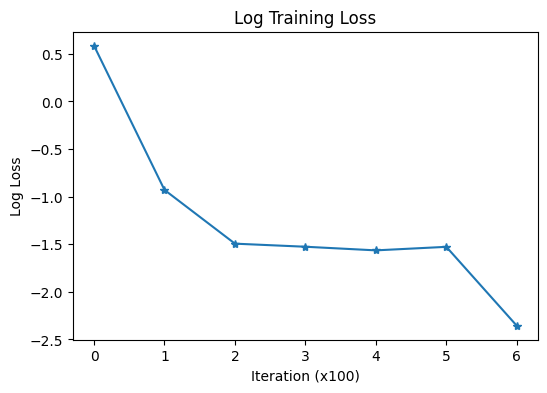

Time step 2 Loss: 2.3978955912590028
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.95 seconds.
Number of NaN losses encountered: 0


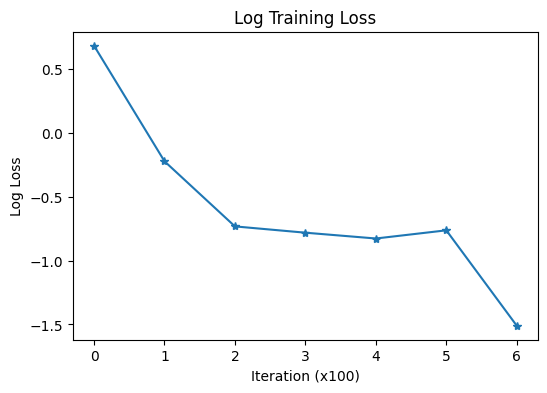

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.73 seconds.
Number of NaN losses encountered: 0


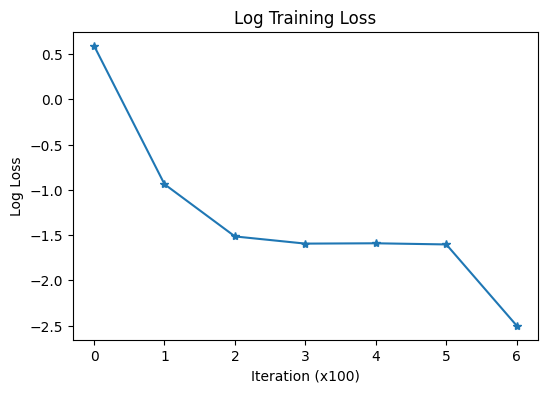

Time step 1 Loss: 0.7058788469433784
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.88 seconds.
Number of NaN losses encountered: 0


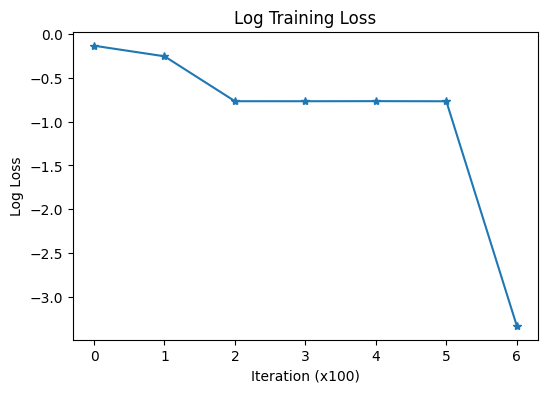

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 7.35 seconds.
Number of NaN losses encountered: 0


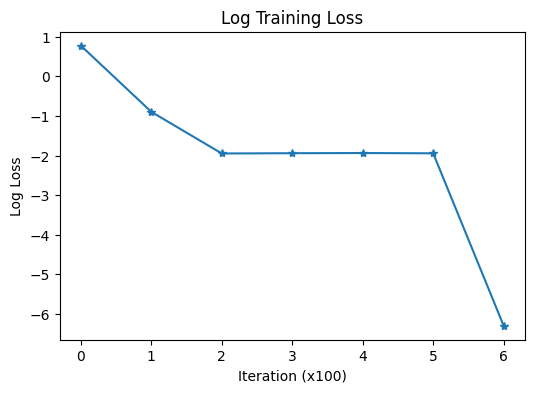

Time step 0 Loss: 0.0409271380987775
Final value at time 0: 9.843294143676758
-----------------------------------------------
Run: 6.0000
Time step 4 Loss: 0.0006252481881369931
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.70 seconds.
Number of NaN losses encountered: 0


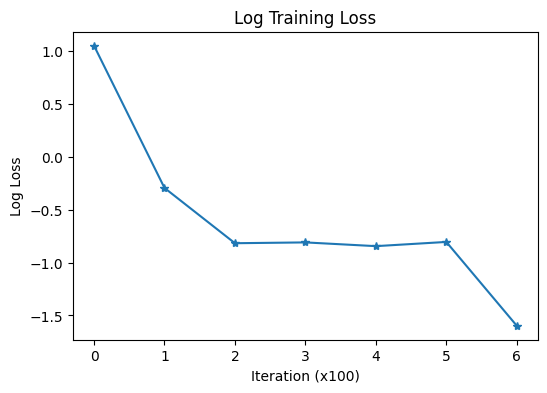

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.79 seconds.
Number of NaN losses encountered: 0


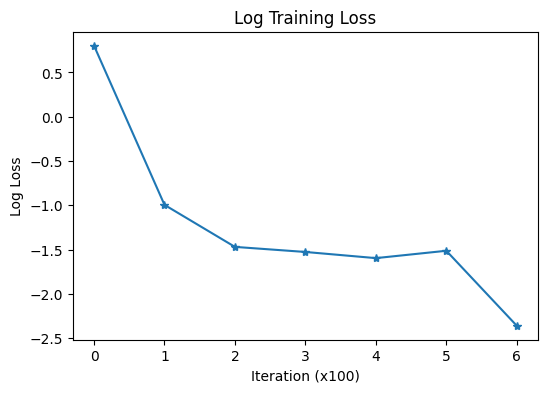

Time step 3 Loss: 3.534492793083191
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.30 seconds.
Number of NaN losses encountered: 0


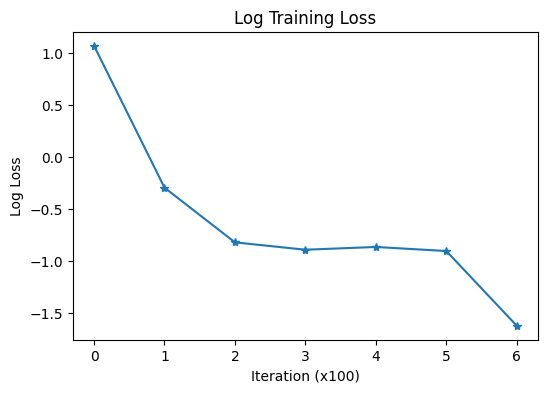

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.43 seconds.
Number of NaN losses encountered: 0


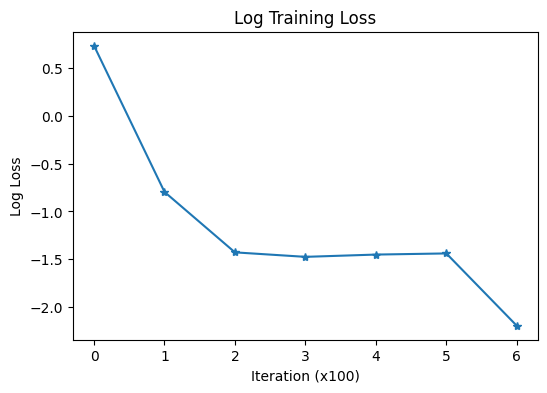

Time step 2 Loss: 1.9051316511631011
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.34 seconds.
Number of NaN losses encountered: 0


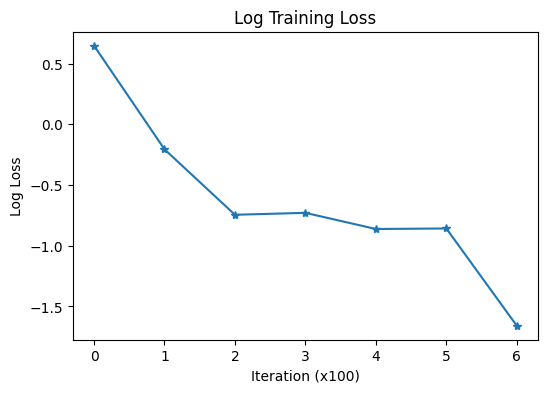

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.08 seconds.
Number of NaN losses encountered: 0


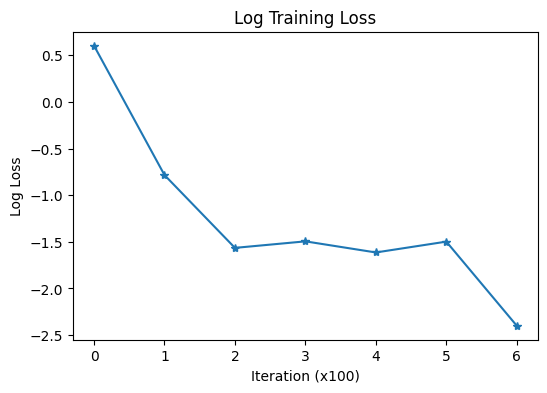

Time step 1 Loss: 0.8209172117710114
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.28 seconds.
Number of NaN losses encountered: 0


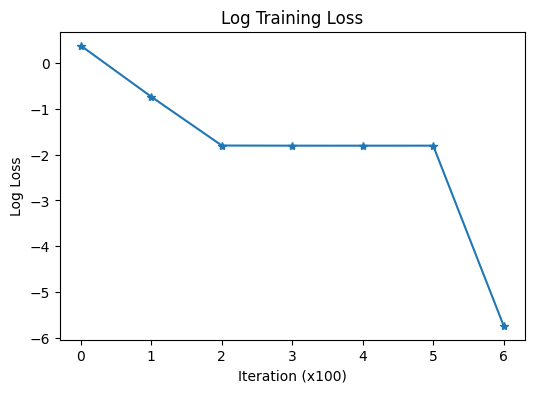

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.17 seconds.
Number of NaN losses encountered: 0


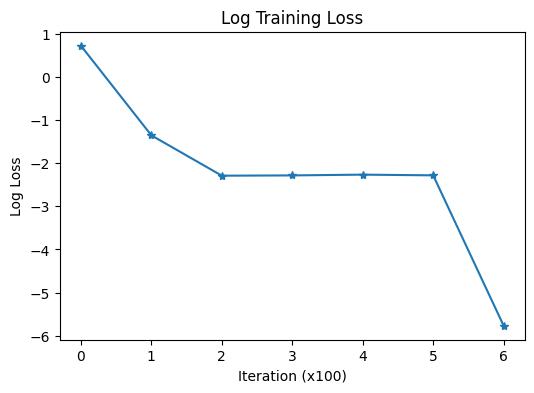

Time step 0 Loss: 0.25571888066522663
Final value at time 0: 5.313546180725098
-----------------------------------------------
Run: 7.0000
Time step 4 Loss: 0.009568994907895104
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.35 seconds.
Number of NaN losses encountered: 0


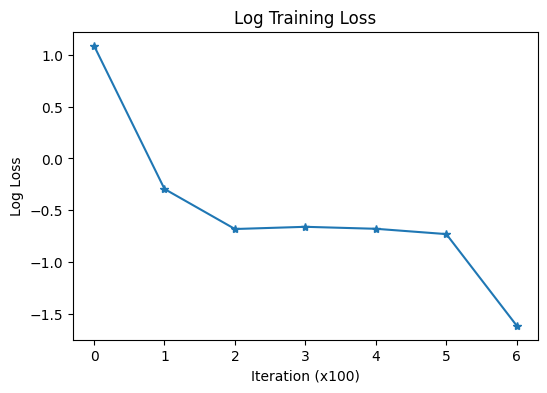

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.36 seconds.
Number of NaN losses encountered: 0


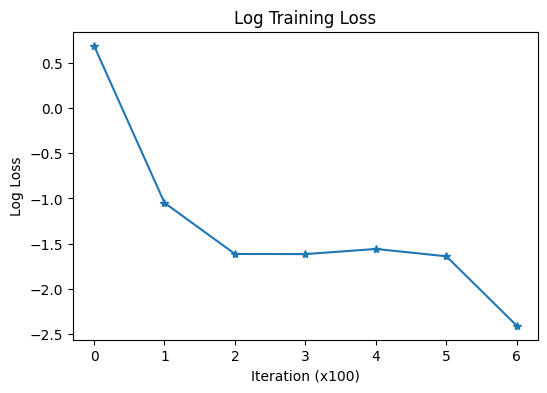

Time step 3 Loss: 4.08542414188385
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.90 seconds.
Number of NaN losses encountered: 0


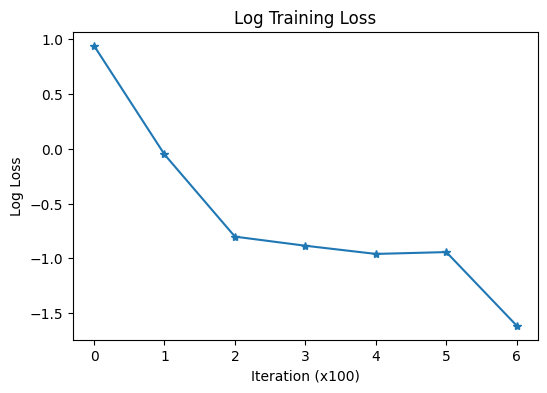

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.11 seconds.
Number of NaN losses encountered: 0


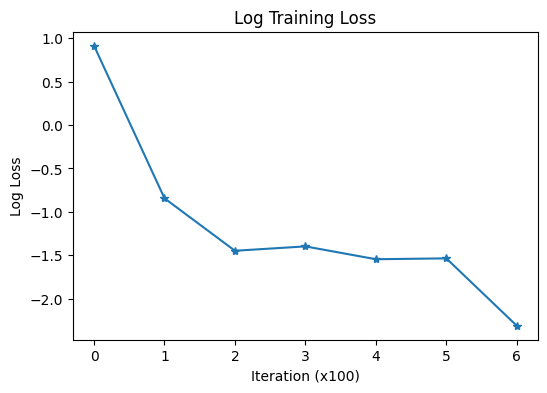

Time step 2 Loss: 2.564997847080231
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.18 seconds.
Number of NaN losses encountered: 0


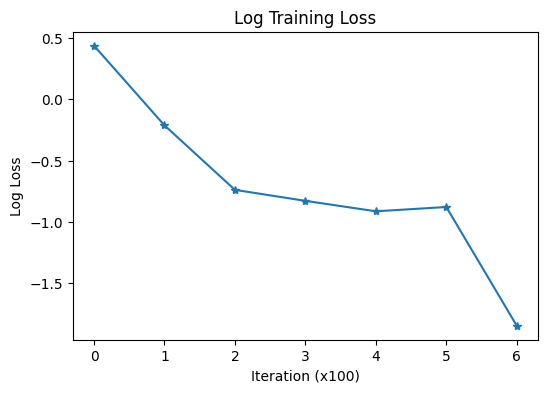

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.08 seconds.
Number of NaN losses encountered: 0


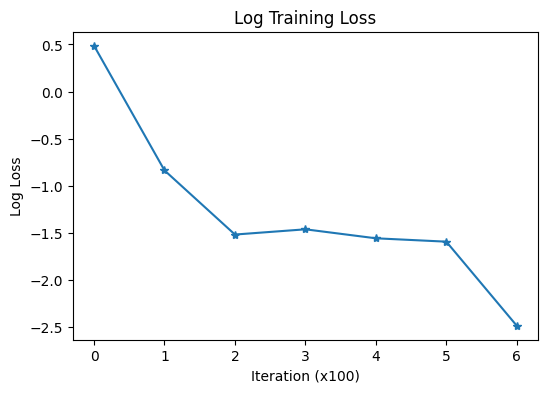

Time step 1 Loss: 1.5563085198402404
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.14 seconds.
Number of NaN losses encountered: 0


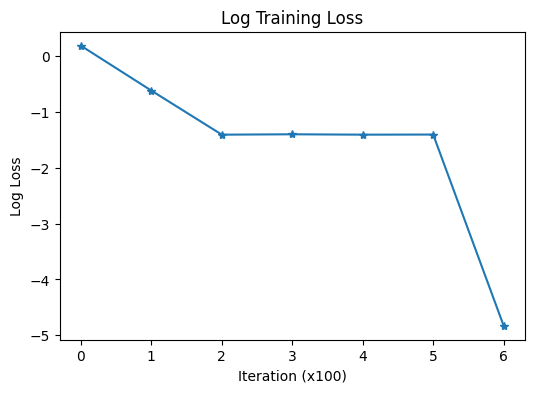

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.39 seconds.
Number of NaN losses encountered: 0


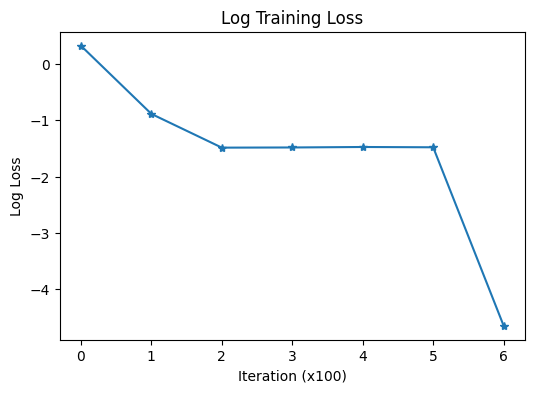

Time step 0 Loss: 0.2619032756846809
Final value at time 0: 6.473219394683838
-----------------------------------------------
Run: 8.0000
Time step 4 Loss: 0.0010620974725679844
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.34 seconds.
Number of NaN losses encountered: 0


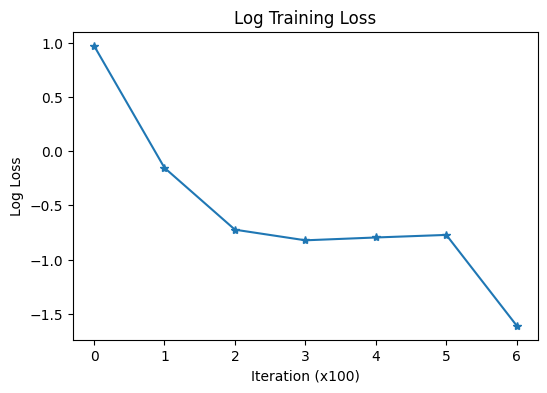

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.35 seconds.
Number of NaN losses encountered: 0


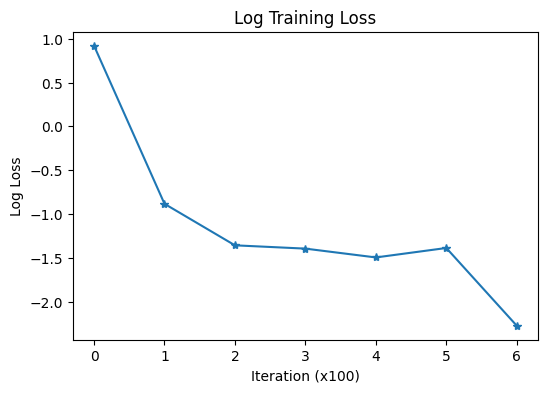

Time step 3 Loss: 3.1476908349990844
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.21 seconds.
Number of NaN losses encountered: 0


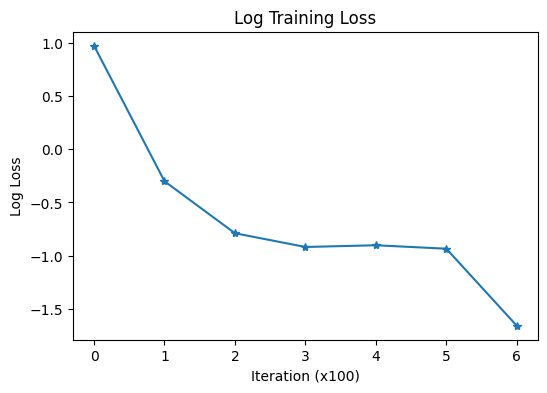

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.31 seconds.
Number of NaN losses encountered: 0


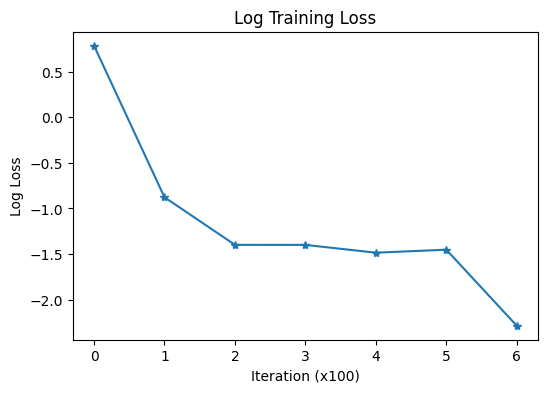

Time step 2 Loss: 1.5060493302345277
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.17 seconds.
Number of NaN losses encountered: 0


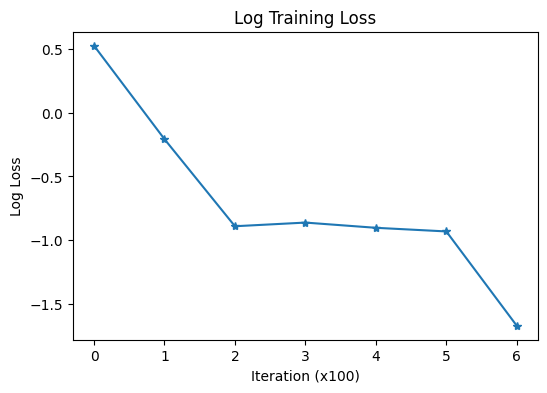

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.42 seconds.
Number of NaN losses encountered: 0


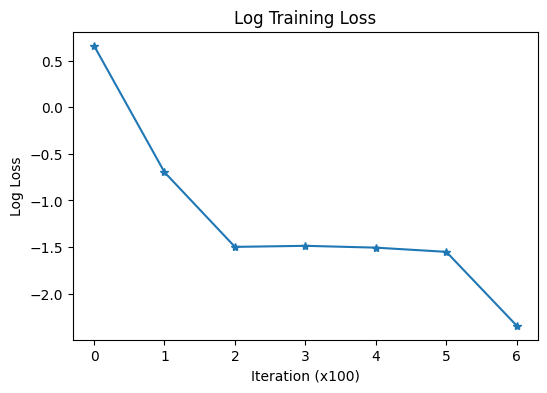

Time step 1 Loss: 0.49435851752758025
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.28 seconds.
Number of NaN losses encountered: 0


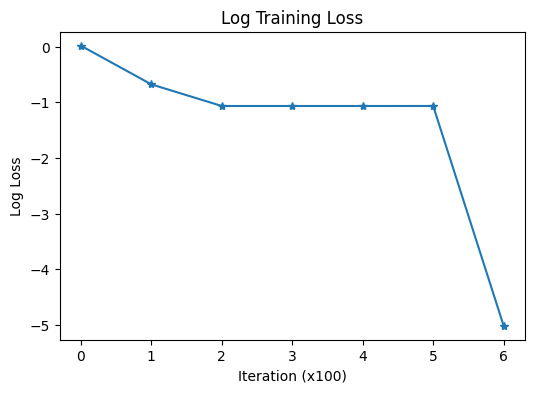

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.25 seconds.
Number of NaN losses encountered: 0


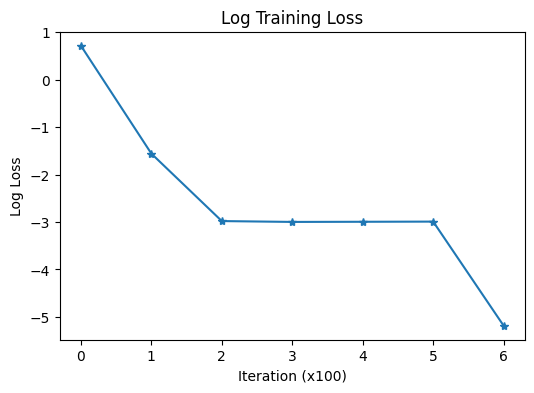

Time step 0 Loss: 7.697194670384988e-05
Final value at time 0: 7.095537185668945
-----------------------------------------------
Run: 9.0000
Time step 4 Loss: 0.006852417894697283
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.40 seconds.
Number of NaN losses encountered: 0


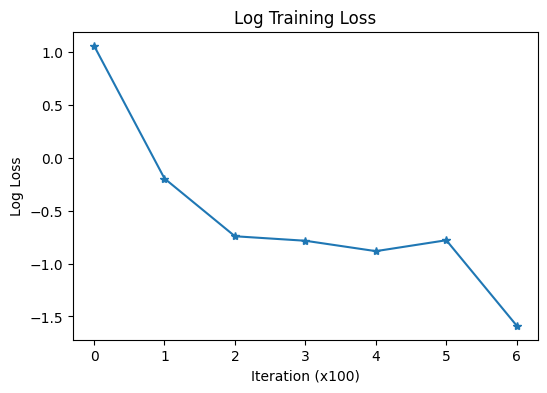

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.39 seconds.
Number of NaN losses encountered: 0


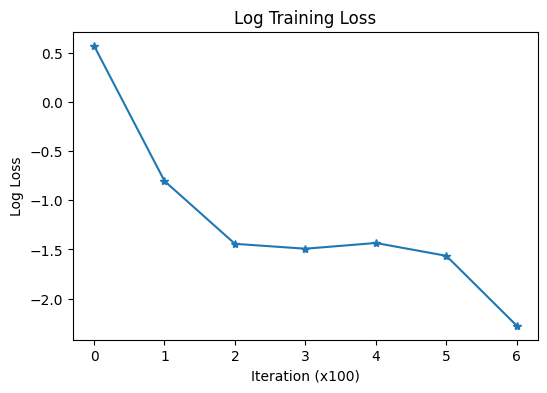

Time step 3 Loss: 3.4699735975265504
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.01 seconds.
Number of NaN losses encountered: 0


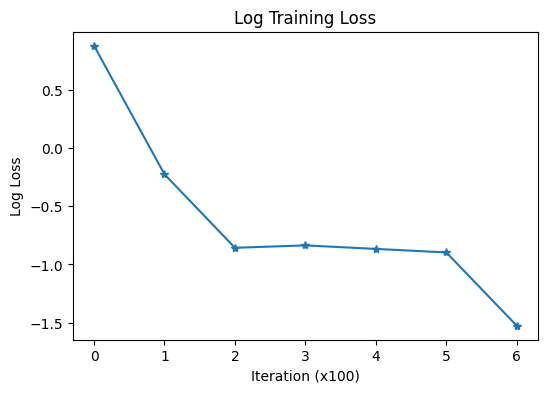

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 9.04 seconds.
Number of NaN losses encountered: 0


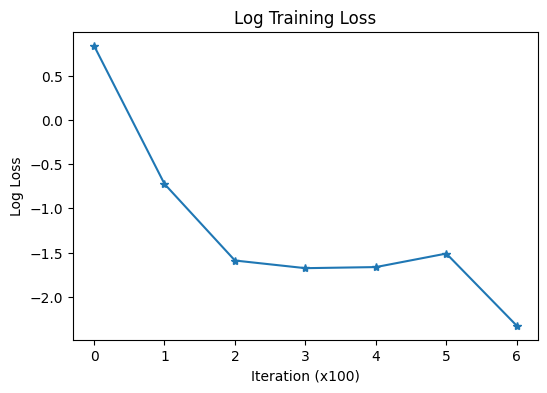

Time step 2 Loss: 1.3439098751544953
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.48 seconds.
Number of NaN losses encountered: 0


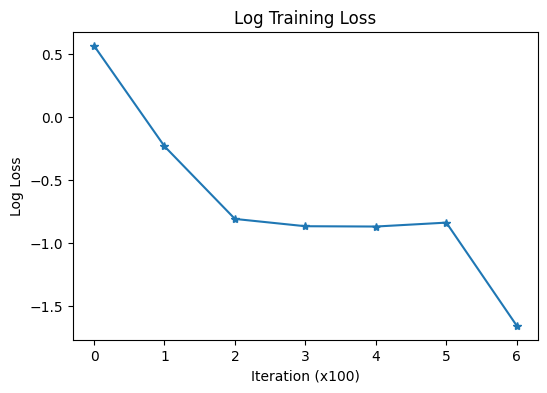

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 8.47 seconds.
Number of NaN losses encountered: 0


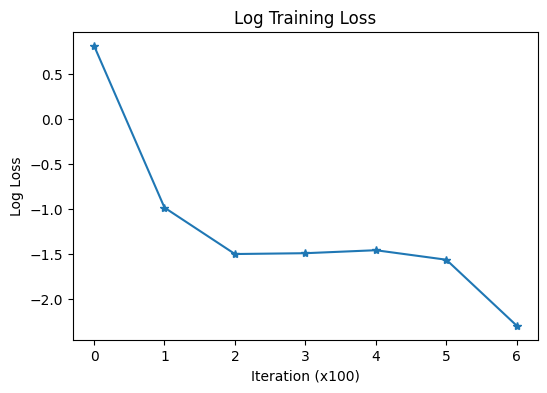

Time step 1 Loss: 0.4133279758691788
44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.59 seconds.
Number of NaN losses encountered: 0


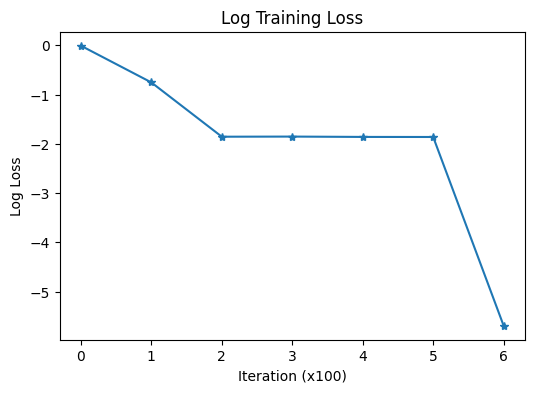

44
Training progress: 0/649
Training progress: 100/649
Training progress: 200/649
Training progress: 300/649
Training progress: 400/649
Training progress: 500/649
Training progress: 600/649
Training took 6.27 seconds.
Number of NaN losses encountered: 0


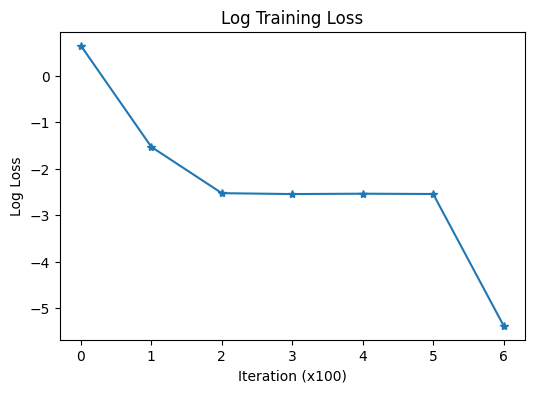

Time step 0 Loss: 0.08884107214122196
Final value at time 0: 5.758952617645264
Average Final Value: 7.5961
Standard Deviation: 1.7390
Comparison with distance_squared: 6.5000


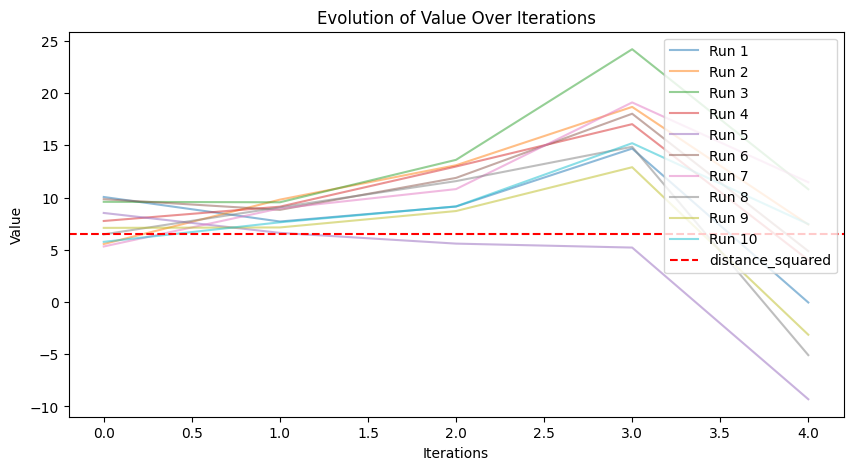

In [ ]:
# Number of runs
num_runs = 10

# Store results
final_values = []
val_histories = []
loss_histories = []

# Run the function multiple times
for i in range(num_runs):
    print("-----------------------------------------------")
    print(f"Run: {i:.4f}")
    x_paths = generate_brownian_motion(num_paths=n_data,x_init=x_init, time_steps=time_steps, scale=scale_x)
    y_paths = generate_brownian_motion(num_paths=n_data,x_init=y_init, time_steps=time_steps, scale=scale_y)
    final_value, val_hist, loss_hist = train_dqn_instance(
        x_dim=1, y_dim=1, time_horizon=time_steps-1,
        samplepath_x=x_paths, samplepath_y=y_paths,
        n_opt=50, in_sample_size=10,
        device=device, discount=1, mem_size=3000, trunc_flag=True, n_iter = 650
    )
    
    final_values.append(final_value)
    val_histories.append(val_hist)
    loss_histories.append(loss_hist)

# Compute statistics
final_values = np.array(final_values)
mean_final_value = np.mean(final_values)
std_final_value = np.std(final_values)


# Print results
print(f"Average Final Value: {mean_final_value:.4f}")
print(f"Standard Deviation: {std_final_value:.4f}")
print(f"Comparison with distance_squared: {distance_squared:.4f}")

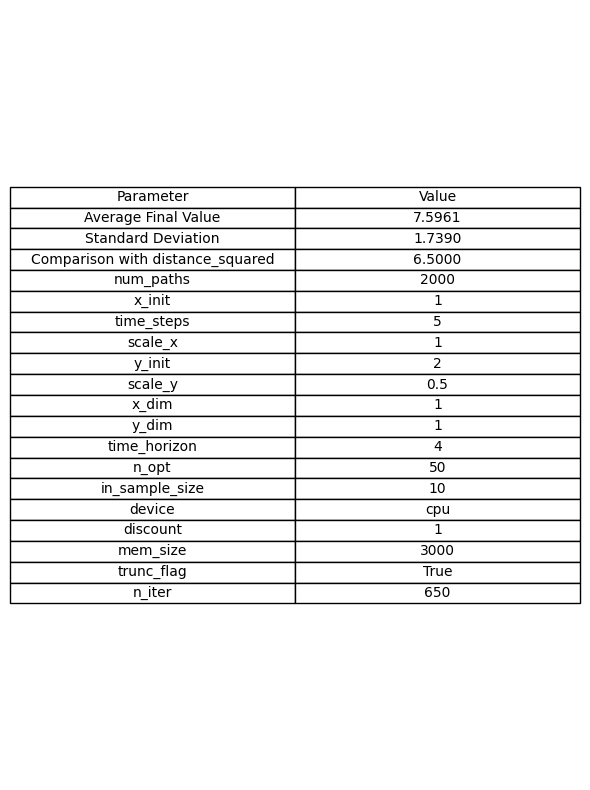

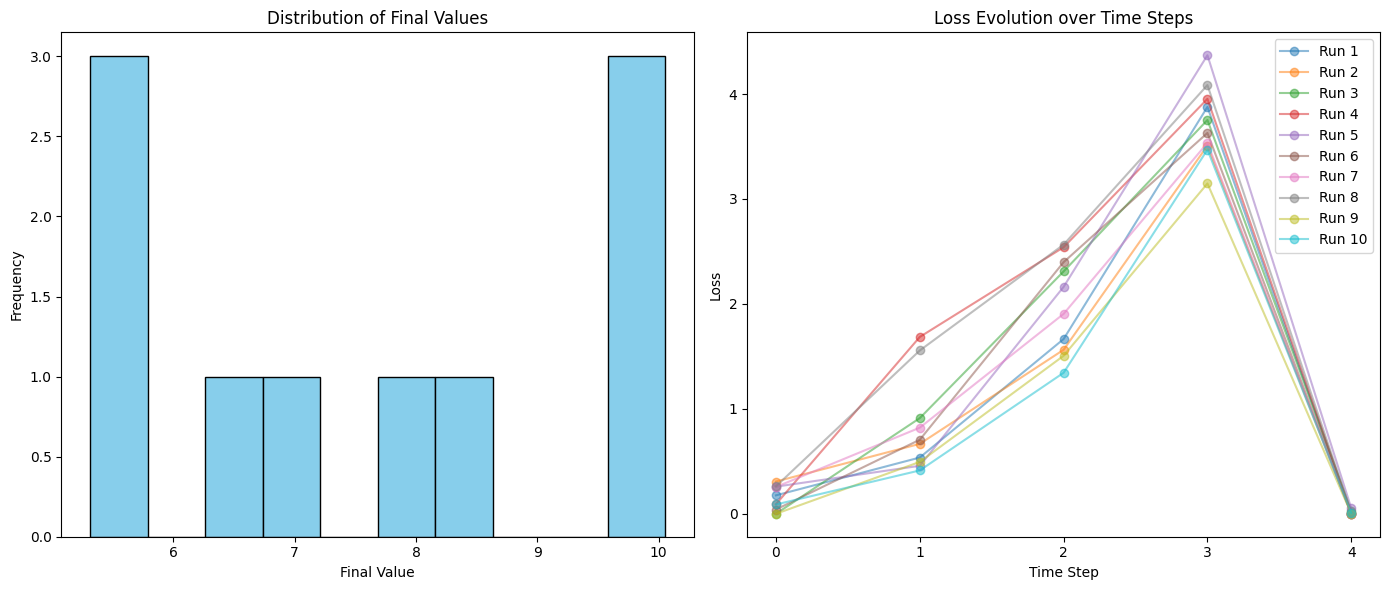

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Create a PNG table with the parameters and computed results
# -------------------------

# Prepare table data: computed values and the parameters used.
table_data = [
    ["Average Final Value", f"{mean_final_value:.4f}"],
    ["Standard Deviation", f"{std_final_value:.4f}"],
    ["Comparison with distance_squared", f"{distance_squared:.4f}"],
    # Brownian motion parameters:
    ["num_paths", f"{n_data}"],
    ["x_init", f"{x_init}"],
    ["time_steps", f"{time_steps}"],
    ["scale_x", f"{scale_x}"],
    ["y_init", f"{y_init}"],
    ["scale_y", f"{scale_y}"],
    # DQN training parameters:
    ["x_dim", "1"],
    ["y_dim", "1"],
    ["time_horizon", f"{time_steps - 1}"],
    ["n_opt", "50"],
    ["in_sample_size", "10"],
    ["device", f"{device}"],
    ["discount", "1"],
    ["mem_size", "3000"],
    ["trunc_flag", "True"],
    ["n_iter", "650"]
]

# Create a figure for the table.
fig_table, ax_table = plt.subplots(figsize=(6, 8))
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(
    cellText=table_data, 
    colLabels=["Parameter", "Value"], 
    cellLoc="center", 
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)
fig_table.tight_layout()
plt.savefig("results_table.png", bbox_inches='tight')
plt.show()

# -------------------------
# Plot the distribution of final values and the loss evolution (w.r.t. time steps)
# -------------------------

fig, (ax_hist, ax_loss) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram of final values.
ax_hist.hist(final_values, bins=10, color='skyblue', edgecolor='black')
ax_hist.set_title("Distribution of Final Values")
ax_hist.set_xlabel("Final Value")
ax_hist.set_ylabel("Frequency")

# Plot the loss history for each run with respect to time steps (0 to 4)
# Assume that each loss_hist in loss_histories has a length corresponding to the number of time steps (e.g., 5)
time_steps_axis = np.arange(0, 5)  # Time steps: 0, 1, 2, 3, 4
for i in range(num_runs):
    ax_loss.plot(time_steps_axis, loss_histories[i], marker='o', alpha=0.5, label=f'Run {i+1}')
    
ax_loss.set_title("Loss Evolution over Time Steps")
ax_loss.set_xlabel("Time Step")
ax_loss.set_ylabel("Loss")
ax_loss.set_xticks(time_steps_axis)
ax_loss.legend()

plt.tight_layout()
plt.savefig("loss_and_final_values.png", bbox_inches='tight')
plt.show()


Time step 0 Loss: 0.011350940124611953
Final value at time 0: 4.033431529998779
Average Final Value: 6.2064
Standard Deviation: 1.9991
Comparison with distance_squared: 6.5000

2000 sample path n_opt = 20, in_sample size = 10